# Dimensionality Reduction

http://www.bogotobogo.com/python/scikit-learn/scikit_machine_learning_Data_Preprocessing-III-Dimensionality-reduction-via-Sequential-feature-selection-Assessing-feature-importance-via-random-forests.php



In [1]:
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
import numpy as np

wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
                   header = None)
wine.columns = ['Class Label','Alcohol','Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols','Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity','Hue','OD280/OD315 of diluted wines', 'Proline']
from sklearn.model_selection import train_test_split

X, y = wine.iloc[:,1:], wine.iloc[:,0]

#the train test split command
X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

## Sequential Feature Selection


Avoid overfitting by reducing the complexity of the model... the number of inputs. Sequential feature selection chooses the most informative feature at each step, and then chooses the next feature depending on the already selected features.

### Algorithms for Feature Selection

Reduce a d-space to a k-subspace. A greedy algorithm. Can boost computational efficiency or generalization accuracy by removing noise.

#### Sequential Backwards Selection
Start with d features and remove one at a time. 

NOT YET IMPLEMENTED IN SCIKIT LEARN

#### Random Decision Forests

    Select relevant features from a data set. Once you fit the RandomForestClassifier(), use the feature_importances_attribute.



In [2]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = wine.columns[1:]
forest = RandomForestClassifier(n_estimators = 10000, random_state = 0, n_jobs = 1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
index = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print(f+1, feat_labels[f], importances[index[f]])

1 Alcohol 0.180707341384
2 Malic acid 0.166708250321
3 Ash 0.150046789721
4 Alcalinity of ash 0.118761472745
5 Magnesium 0.107331347953
6 Total phenols 0.0812867520108
7 Flavanoids 0.0475825938229
8 Nonflavanoid phenols 0.0374065748616
9 Proanthocyanins 0.0368337155634
10 Color intensity 0.0254674385533
11 Hue 0.0205771627448
12 OD280/OD315 of diluted wines 0.0164775586546
13 Proline 0.0108130016652


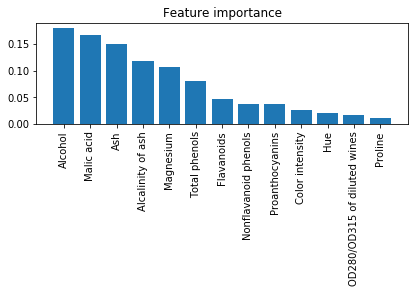

In [3]:
plt.bar(range(X_train.shape[ 1]), importances[index], align ='center')
plt.xticks(range(X_train.shape[1]),feat_labels, rotation = 90)
plt.tight_layout()
plt.title('Feature importance')
plt.show()

## Dimensionality Reduction (Principal Component Analysis)

http://bogotobogo.com/python/scikit-learn/scikit_machine_learning_Data_Compresssion_via_Dimensionality_Reduction_1_Principal_component_analysis%20_PCA.php

### PCA 
A statistical procedure that uses an orthagonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components.

Tries to find the direction (feature in a n dim space) of maximum variance in our data, and projects this direction onto a new subspace with a lower dimension.


Amounts to: what line would have the most spread out projection of the data?

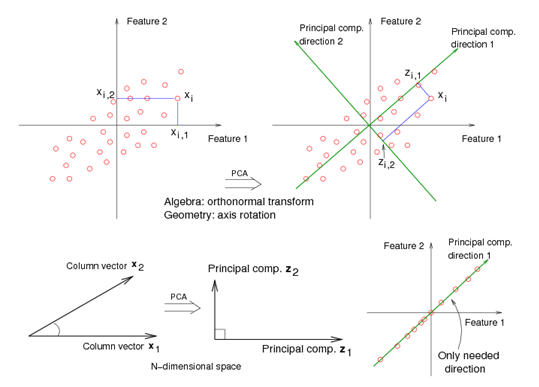

#### The Method

 Given a space with n dimensions (n festures), need a transformation matrix that is $ n \times k$ dimensions.
 
 
 Computationally find this by taking a sample of our original population and mapping them with the transformation matrix onto the k dimensional subspace. The First Principal Component will have the largest possible variance projection. All other pricipal components will be orthagonal to the First Principal Component, and will be chosen based on the amount of variance that each orthagonal direction provides to a projection onto that axis.
 
 ##### PCA HIGHLY SENSITIVE TO SCALING >>> StandardScaler
 
 Note that PCA is technically a unsupervised machine learning transformation that maximizes the seperation of your dataset. Unsupervised also implies that class labels are ignore
 
 1. Create a $n \times n$ covariance matrix. (covariance between each of the n features.)
 2. Calculate the eigenvectors of the covariance matrix, which represent the principal components.
 
 


 If A is the covariance matrix, then the Eigenvector $v$ satisfies the following (lambda the eigenvalue):
 
 
$\mathbf A \mathbf \nu = \lambda \mathbf \nu$


Essentially a coordinate decomposition of your matrix. Only choose the k eigenvectors that contain most of the variance. Choose the eigenvectors that correspond to the largest $k$ eigenvalues.


The eigenvalues can also be considered as the explained variance of that principal component


Linear classifiers will work better with the result of the PCA,  however much information is lost in the process of rebasising

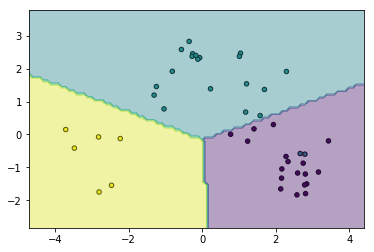

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr.fit(X_train_pca, y_train)

from VisualFuncs import VDR
VDR([0,1],X_test_pca, y_test, lr)